#### Problem 3.3 For the double semi circle task in Problem 3.1 , set sep = -5 and generate 2, 000 examples. (a) What will happen if you run PLA on those examples?

PLA took 3917 iterations to converge
z = [-15.          -7.90420471  -4.58885576]
slope = -1.7224783518568119
intercept = -3.2687887316080677


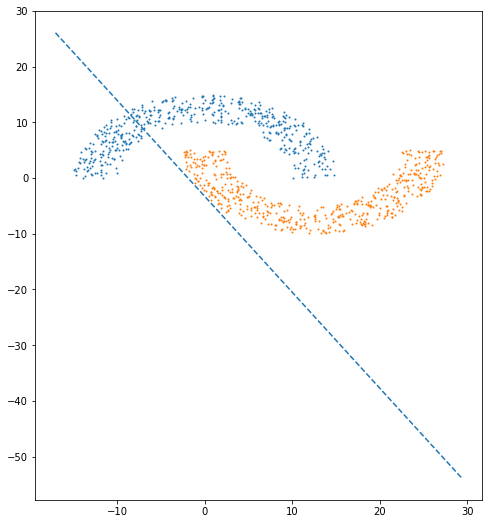

In [79]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
rad = 10
thk = 5
sep = -5

plt.figure(figsize=(8,9))

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom


top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)


# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2

X= [np.array(data[i][:3])for i in range(1000)]
Y= [np.array(data[i][3])for i in range(1000)]
    

def Perceptron(X, Y):

    weights = np.array([0,0,0])

    epoch = 100
    iteration = 0
    
    for k in range(epoch):
        for i, n in enumerate(X):

            predicted_y =  np.sign(np.dot(X[i] ,(np.transpose(weights))))

            actual_y = Y[i]

            if predicted_y == actual_y:
                weights = weights
            else:
                iteration = iteration + 1
                weights = weights + (X[i] * Y[i])
                   
    print("PLA took " + str(iteration) + " iterations to converge")
    return weights
 

z = Perceptron(X,Y)

w0 = z[0]
w1 = z[1]
w2 = z[2]

slope = -w1/w2
intercept = -w0/w2

print("z =", z)
print("slope =",slope)
print("intercept =",intercept)

# Plot a line from slope and intercept
def abline(slope, intercept):
     
     ax = plt.gca()
     x_value = np.array(ax.get_xlim())
     y_value = intercept + slope * x_value
     plt.plot(x_value, y_value, '--')
        
abline(slope,intercept)         

plt.show()

### PLA will  not  stop updating and converge in this case hence we are limiting the iterations and force stopping.

#### 3.3(b) Run the pocket algorithm for 100, 000 iterations and plot Ein versus the iteration number t.

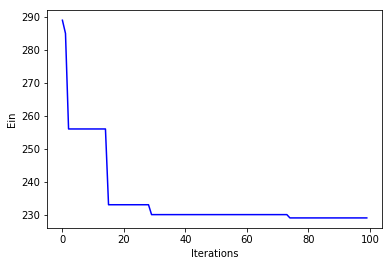

In [30]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

#parameters
rad = 10
thk = 5
sep = -5

#plt.figure(figsize=(8,9))

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


#plt.scatter(X1,Y1,s = 1)
#plt.scatter(X2,Y2,s = 1)

# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2

X= [np.array(data[i][:3])for i in range(1000)]
Y= [np.array(data[i][3])for i in range(1000)]
    
    
def Ein_calc(X,Y,weights):
    
    Ein = 0
    for i, n in enumerate(X):

        predicted_y =  np.sign(np.dot(X[i] ,(np.transpose(weights))))
        actual_y = Y[i]
        if predicted_y != actual_y:            
            Ein = Ein + 1
                        
    return Ein
    
def Perceptron(X, Y):

    weights = np.array([0,0,0])
    pocket_weight = weights
    epoch_weight = pocket_weight
    Ein = []   
    epoch = 100
    iteration = []
    pocket_error = 0                        # initializing the pocket error to be 0 at start for pocket_weight =0
    updated_error = []                      # final error
    
    for k in range(epoch):
        
        pocket_Ein = Ein_calc(X,Y,pocket_weight)  # runs Ein_calc using pocket weight and gets the number of error points for X    
        Ein.append(k)                   # appending epch value to Ein for reference
        iteration.append(k)             # appending the epoch  
        for i, n in enumerate(X):         
            predicted_y =  np.sign(np.dot(X[i] ,(np.transpose(weights))))
            actual_y = Y[i]
            if predicted_y == actual_y:
                weights = weights
                pocket_weight=weights  
            else:             
                weights = weights + (X[i] * Y[i]) 
                pocket_weight = weights
                misclass_Ein = Ein_calc(X,Y, weights) # Using the new weight, runs Ein_calc and find no.of errored points for X               
                if misclass_Ein < pocket_Ein:        # Compares Ein for old weight and new weight
                    pocket_weight = weights          # if new weight has less points than old, new weight is best
                    Ein[k] = misclass_Ein            # Stores the error in a separate array
        
        if ((Ein[k] < pocket_error)):
            pocket_error = Ein[k]                 # Assign Ein as pocket error and append it to updated error list
            updated_error.append(Ein[k])                    
        elif(k>=1):   
            updated_error.append(pocket_error)    # if pocket error is less append it to updated error list
        else:
            pocket_error = Ein[k]
            updated_error.append(pocket_error)   # if both Ein equal, retain pocket error
        
    #print(len(Ein),len(iterate))
    plt.xlabel('Iterations')
    plt.ylabel('Ein')
    plt.plot(iteration,updated_error,color='blue')
    plt.show()
    
    
    return pocket_weight               
                          
            
z = Perceptron(X,Y)



    


#### 3.3 (c) Plot the data and the final hypothesis in part (b ) .

time_elapsed 6.418875409508473e-05
z = [-19.         -16.02805146  -5.0163038 ]
slope = -3.195191539593822
intercept = -3.7876493851148245


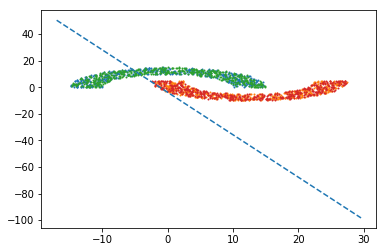

In [24]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import time

time_start = time.clock()
#run your code
time_elapsed = (time.clock() - time_start)
print('time_elapsed', time_elapsed)

plt.figure(figsize=(8,9))

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2

X= [np.array(data[i][:3])for i in range(1000)]
Y= [np.array(data[i][3])for i in range(1000)]
    
    
def Ein_calc(X,Y,weights):
    
    Ein = 0
    for i, n in enumerate(X):

        predicted_y =  np.sign(np.dot(X[i] ,(np.transpose(weights))))
        actual_y = Y[i]
        if predicted_y != actual_y:            
            Ein = Ein + 1
                        
    return Ein
    
def Perceptron(X, Y):

    weights = np.array([0,0,0])
    pocket_weight = weights
    epoch_weight = pocket_weight
    Ein = []   
    pocket_Ein = Ein_calc(X,Y,pocket_weight)  # runs Ein_calc using weights =0 and gets the number of error points for X
    epoch = 100
    iteration = []
    pocket_error = 0
    updated_error = []
    
    for k in range(epoch):
            
        Ein.append(k)
        iteration.append(k)    
        for i, n in enumerate(X):         
            predicted_y =  np.sign(np.dot(X[i] ,(np.transpose(weights))))
            actual_y = Y[i]
            if predicted_y == actual_y:
                weights = weights
                pocket_weight=weights  
            else:             
                weights = weights + (X[i] * Y[i]) 
                pocket_weight = weights
                misclass_Ein = Ein_calc(X,Y, weights) # Using the new weight, runs Ein_calc and find no.of errored points for X               
                if misclass_Ein < pocket_Ein:         # Compares Ein for old weight and new weight
                    pocket_weight = weights           # if new weight has less error points than old, new weight is best
                    Ein[k] = misclass_Ein             # Storing the Errored points in a separate array 
        
    if ((Ein[k] < pocket_error)):          
        pocket_error = Ein[k]                # Assign Ein as pocket error and append it to updated error list
        updated_error = Ein[k]            
    elif(k>=1):   
        updated_error.append(pocket_error)   # if pocket error is less append it to updated error list
    else:
        pocket_error = Ein[k]
        updated_error.append(pocket_error)   # if both Ein equal, retain pocket error
            
    
    return pocket_weight               
                          
            
z = Perceptron(X,Y)

w0 = z[0]
w1 = z[1]
w2 = z[2]

slope = -w1/w2
intercept = -w0/w2

print("z =", z)
print("slope =",slope)
print("intercept =",intercept)


def abline(slope, intercept):
     # Plot a line from slope and intercept
     ax = plt.gca()
     x_value = np.array(ax.get_xlim())
     y_value = intercept + slope * x_value
     plt.plot(x_value, y_value, '--')
        
abline(slope,intercept)         


top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

#plt.plot(slope,'bx')
#plt.plot(intercept,'rx')


plt.show()


    


#### 3.3(d) Use the linear regression algorithm to obtain the weights w, and compare this result with the pocket algorithm in terms of computation time and quality of the solution .

time_elapsed 3.096163436566712e-05
X: (1000, 3)
X_trans (3, 1000)
z = [-0.12059439 -0.02219944  0.10219446]
slope = 0.217227474790305
intercept = 1.1800482002336878


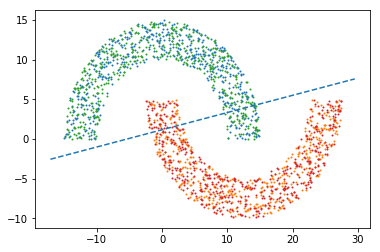

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

time_start = time.clock()
#run your code
time_elapsed = (time.clock() - time_start)
print('time_elapsed', time_elapsed)

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2

X = []
Y = []

for i in range(1000):
    Y.append(data[i][3])
#print(Y)

for i in range(1000):
    X.append(data[i][:3])


def linear_reg(X,Y):
    
    print("X:",np.shape(X))
    
    X_trans = np.transpose(X)
    print("X_trans",np.shape(X_trans))
    
    X_1 = (np.matmul(X_trans,X)) 
    X_inverse = np.linalg.inv(X_1)
    #print("X_inverse:",np.shape(X_inverse))
    
    X_pseudoinverse = np.matmul(X_inverse,X_trans)
    #print("X_pseudoinverse",np.shape(X_pseudoinverse))
    #print("Y:",np.shape(Y))
    
    w_lin = np.matmul(X_pseudoinverse, Y )
    #print("w_lin",np.shape(w_lin))   
    return (w_lin)
    
z = linear_reg(X,Y)



w0 = z[0]
w1 = z[1]
w2 = z[2]

slope = -w1/w2
intercept = -w0/w2

print("z =", z)
print("slope =",slope)
print("intercept =",intercept)


def abline(slope, intercept):
     # Plot a line from slope and intercept
     ax = plt.gca()
     x_value = np.array(ax.get_xlim())
     y_value = intercept + slope * x_value
     plt.plot(x_value, y_value, '--')
        
abline(slope,intercept)         


top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

#plt.plot(slope,'bx')
#plt.plot(intercept,'rx')


plt.show()




### From the above pocket and linear algorithms we observe that the computaion of pocket is more when compared to linear but when comparing the quality of solution, pocket performs better. 
#### Note : Due the very long computation time  and system speed constraints for 100,000 iterations, I'm considering only 100 iterations as a sample and testing.